In [16]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
sys.path.append("../")
import utils

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [3]:
print(
    "scp cbsu:/home2/ayh8/clipnet_k562/data/mpra/k562_mpra_snps_ref_fold0_deepshap_quantity.npz \
        ~/github/scratch"
)
print(
    "scp cbsu:/home2/ayh8/clipnet_k562/data/mpra/k562_mpra_snps_alt_fold0_deepshap_quantity.npz \
        ~/github/scratch"
)

scp cbsu:/home2/ayh8/clipnet_k562/data/mpra/k562_mpra_snps_ref_fold0_deepshap_quantity.npz         ~/github/scratch
scp cbsu:/home2/ayh8/clipnet_k562/data/mpra/k562_mpra_snps_alt_fold0_deepshap_quantity.npz         ~/github/scratch


In [4]:
data = pd.read_csv("~/github/scratch/k562_allelic_mpra_snps.csv.gz")

In [5]:
data["pred"] = np.log2(data["ref"] / data["alt"])
data["pred_procapnet"] = np.log2(data["ref_procapnet_ensemble"] / data["alt_procapnet_ensemble"])
for i in range(7):
    data[f"procapnet_fold_{i}"] = np.log2(data[f"ref_procapnet_fold_{i}"] / data[f"alt_procapnet_fold_{i}"])
#data = data[np.isfinite(data["pred"])]
#data.dropna(inplace=True)
#data = data[data.emVar_K562 == 1]

/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
test_data = data[data["fold"] == 0].reset_index().sort_values(by="pred")["pred"]

In [13]:
ref_shap = np.load(
    "/Users/adamhe/github/scratch/k562_mpra_snps_ref_fold0_deepshap_quantity.npz"
)["arr_0"]
alt_shap = np.load(
    "/Users/adamhe/github/scratch/k562_mpra_snps_alt_fold0_deepshap_quantity.npz"
)["arr_0"]

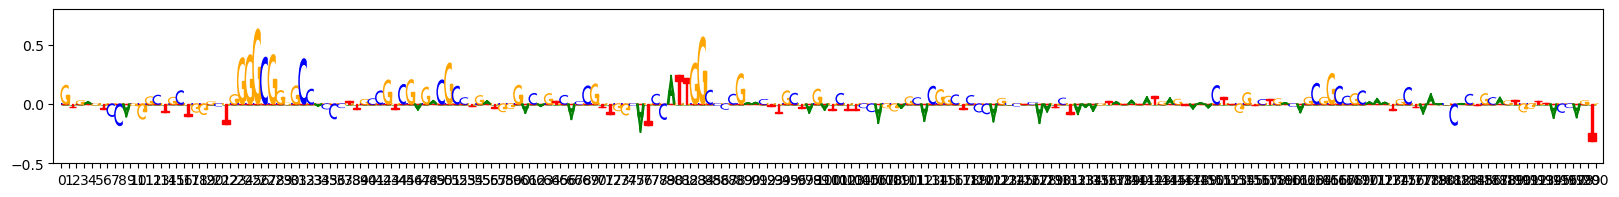

In [27]:
utils.plot_weights(ref_shap[test_data.index[-1], :, 400:600], neg_height=-0.5, pos_height=0.8)

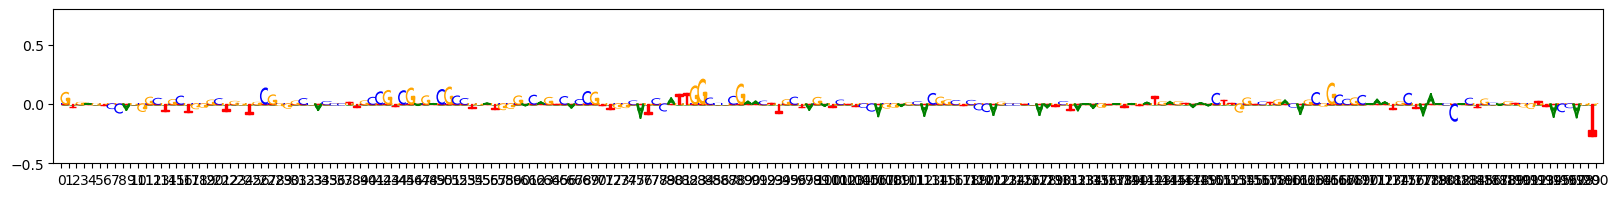

In [28]:
utils.plot_weights(alt_shap[test_data.index[-1], :, 400:600], neg_height=-0.5, pos_height=0.8)

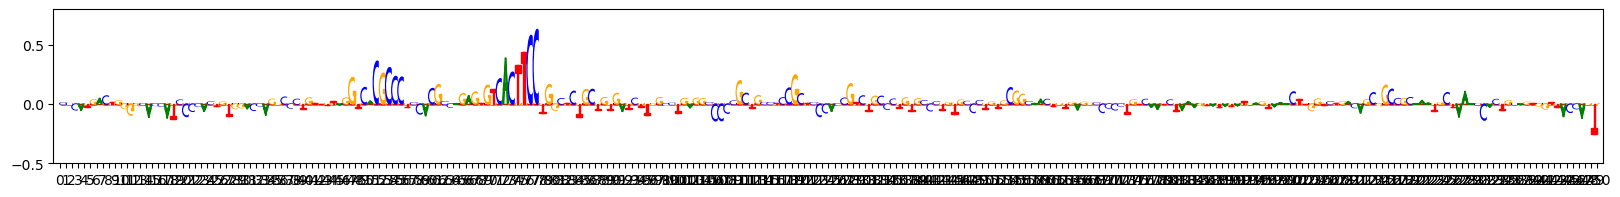

In [31]:
utils.plot_weights(ref_shap[test_data.index[-2], :, 350:600], neg_height=-0.5, pos_height=0.8)

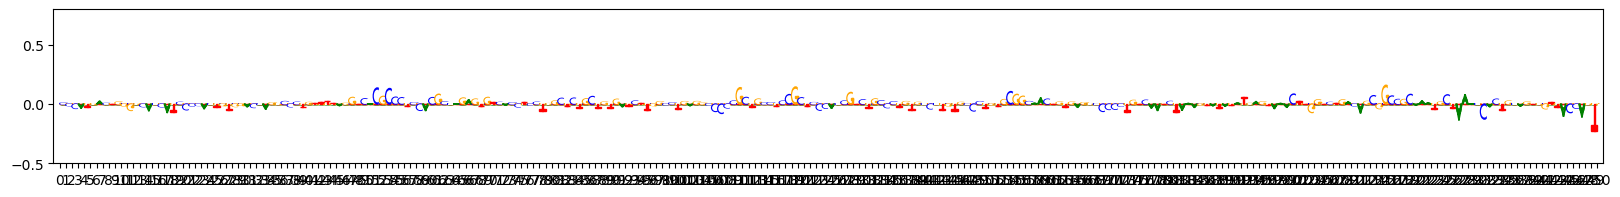

In [32]:
utils.plot_weights(alt_shap[test_data.index[-2], :, 350:600], neg_height=-0.5, pos_height=0.8)

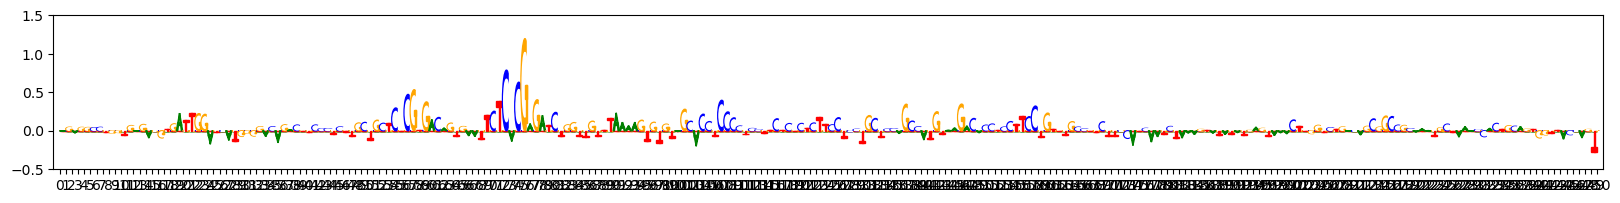

In [39]:
utils.plot_weights(ref_shap[test_data.index[-3], :, 350:600], neg_height=-0.5, pos_height=1.5)

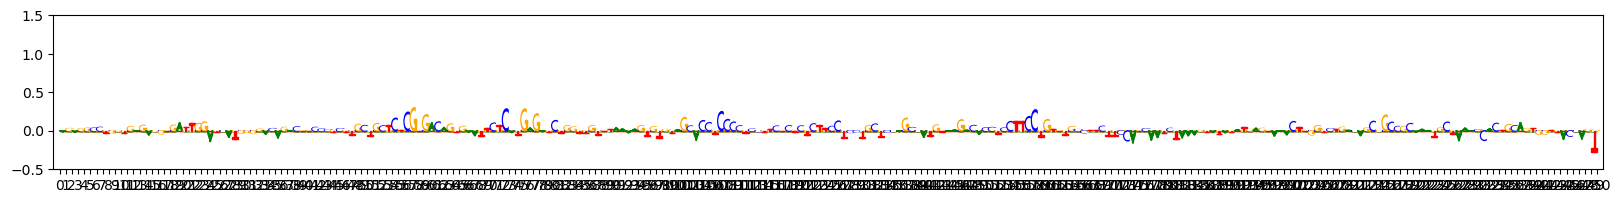

In [40]:
utils.plot_weights(alt_shap[test_data.index[-3], :, 350:600], neg_height=-0.5, pos_height=1.5)

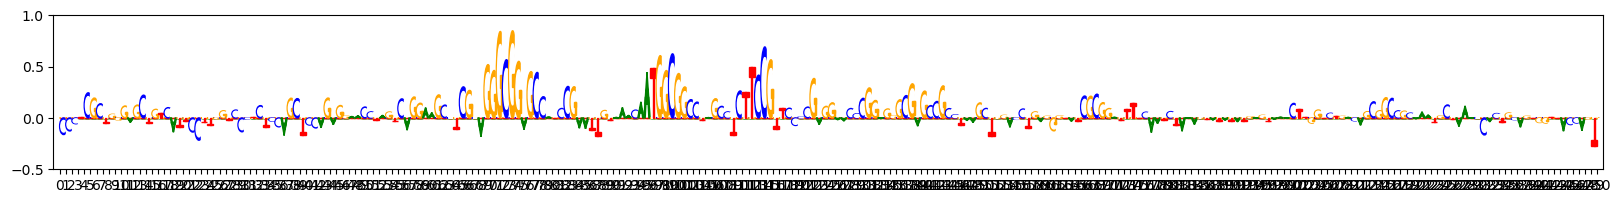

In [44]:
utils.plot_weights(ref_shap[test_data.index[-4], :, 350:600], neg_height=-0.5, pos_height=1)

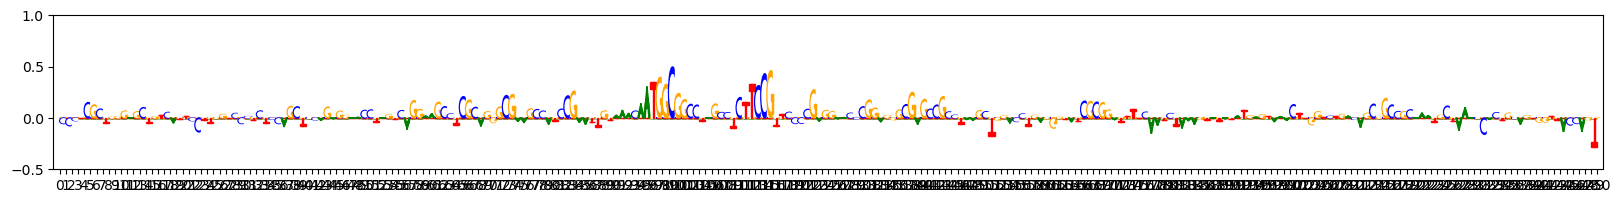

In [43]:
utils.plot_weights(alt_shap[test_data.index[-4], :, 350:600], neg_height=-0.5, pos_height=1)